In [ ]:
# code to collect the twitter data
import tweepy
import os
import pandas as pd
consumer_key = "os.environ.get('consumer_key')"
consumer_secret = "os.environ.get('consumer_secret')"
access_token = "os.environ.get('access_token')"
access_token_secret = "os.environ.get('access_token_secret')"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# create list to append tweets to
tweets = []

# append all tweet data to list
for tweet in tweepy.Cursor(api.search,q='#BigFourAgenda OR #bigfouragenda OR Big Four Agenda',count=10000000,
                       until="2019-03-20").items(10000000):
    tweets.append(tweet)

# convert 'tweets' list to pandas.DataFrame
tweets_df = pd.DataFrame(vars(tweets[i]) for i in range(len(tweets)))

# define file path (string) to save csv file to
FILE_PATH = 'io2.txt'

# use pandas to save dataframe to csv
tweets_df.to_csv(FILE_PATH)


In [74]:
import pandas as pd #for data munging,manipulations and preparations
import numpy as np #for numerical and mathematical calculations
import seaborn as sns #for statostical data visualization
import matplotlib.pyplot as plt #for ploting graphs(histograms,heatplots,lineplots)
%matplotlib inline
import warnings #to ignore the warnings
warnings.filterwarnings("ignore")
import re
import nltk
import wordcloud

In [62]:
#loading and reading data from a csv file then printing the first few rows to undestand the various data colums
df=pd.read_csv("io.csv")
df.head()

,Unnamed: 0,_api,_json,author,contributors,coordinates,created_at,entities,extended_entities,favorite_count,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,source_url,text,truncated,user
0,0,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Wed Mar 20 20:41:45 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,...,NaN,NaN,15,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for Android,http://twitter.com/download/android,"RT @IamSamiSamuel: ""I’m pretty confident that,...",False,User(_api=<tweepy.api.API object at 0x7f0e6d72...
1,1,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Wed Mar 20 20:30:35 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",NaN,0,...,NaN,NaN,4,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for Android,http://twitter.com/download/android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con...",False,User(_api=<tweepy.api.API object at 0x7f0e6d72...
2,2,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Wed Mar 20 20:26:30 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-20 20:26:30,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",NaN,0,...,NaN,NaN,4,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for Android,http://twitter.com/download/android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con...",False,User(_api=<tweepy.api.API object at 0x7f0e6d72...
3,3,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Wed Mar 20 20:10:10 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-20 20:10:10,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",NaN,0,...,NaN,NaN,4,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for iPhone,http://twitter.com/download/iphone,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con...",False,User(_api=<tweepy.api.API object at 0x7f0e6d72...
4,4,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Wed Mar 20 20:07:35 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-20 20:07:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",NaN,0,...,NaN,NaN,4,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for Android,http://twitter.com/download/android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con...",False,User(_api=<tweepy.api.API object at 0x7f0e6d72...


In [15]:
#viewing the bottom last part of the data
df.tail()

,Unnamed: 0,_api,_json,author,contributors,coordinates,created_at,entities,extended_entities,favorite_count,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,source_url,text,truncated,user
1781,1781,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Mon Mar 11 17:38:41 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-11 17:38:41,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,...,NaN,NaN,5,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for iPhone,http://twitter.com/download/iphone,RT @GovernorWajir: Signed an MOU with @WFP on ...,False,User(_api=<tweepy.api.API object at 0x7f0e6d72...
1782,1782,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Mon Mar 11 17:32:46 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-11 17:32:46,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,9,...,NaN,NaN,5,False,NaN,Twitter for iPhone,http://twitter.com/download/iphone,Signed an MOU with @WFP on Sustainable Food Se...,True,User(_api=<tweepy.api.API object at 0x7f0e6d72...
1783,1783,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Mon Mar 11 15:47:36 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-11 15:47:36,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,...,NaN,NaN,0,False,NaN,Twitter for Android,http://twitter.com/download/android,@kipmurkomen If I'm not misinformed..The hands...,True,User(_api=<tweepy.api.API object at 0x7f0e6d72...
1784,1784,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Mon Mar 11 15:25:58 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-11 15:25:58,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,...,NaN,NaN,6,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for Android,http://twitter.com/download/android,RT @Lagaless: We have not only supported Big F...,False,User(_api=<tweepy.api.API object at 0x7f0e6d72...
1785,1785,<tweepy.api.API object at 0x7f0e6d724ac8>,{'created_at': 'Mon Mar 11 15:25:56 +0000 2019...,User(_api=<tweepy.api.API object at 0x7f0e6d72...,NaN,NaN,2019-03-11 15:25:56,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,...,NaN,NaN,7,False,Status(_api=<tweepy.api.API object at 0x7f0e6d...,Twitter for Android,http://twitter.com/download/android,RT @Lagaless: We support the Big Four agenda a...,False,User(_api=<tweepy.api.API object at 0x7f0e6d72...


In [16]:
#index,data type and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 35 columns):
Unnamed: 0                   1786 non-null int64
_api                         1786 non-null object
_json                        1786 non-null object
author                       1786 non-null object
contributors                 0 non-null float64
coordinates                  0 non-null float64
created_at                   1786 non-null object
entities                     1786 non-null object
extended_entities            27 non-null object
favorite_count               1786 non-null int64
favorited                    1786 non-null bool
geo                          0 non-null float64
id                           1786 non-null int64
id_str                       1786 non-null int64
in_reply_to_screen_name      107 non-null object
in_reply_to_status_id        92 non-null float64
in_reply_to_status_id_str    92 non-null float64
in_reply_to_user_id          107 non-null float64
in_reply_t

In [17]:
#size and dimension of the data frame
df.shape
print("Data frame dimensions:",df.shape)

Data frame dimensions: (1786, 35)


In [18]:
#displaying the columns in the data set
df.count().to_frame().T

,Unnamed: 0,_api,_json,author,contributors,coordinates,created_at,entities,extended_entities,favorite_count,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,source_url,text,truncated,user
0,1786,1786,1786,1786,0,0,1786,1786,27,1786,...,35,35,1786,1786,1494,1786,1786,1786,1786,1786


In [19]:
#Droping columns(not useful to us) in the data frame
to_drop=["quoted_status_id","quoted_status_id_str","retweeted","retweeted_status","truncated","coordinates","user"]
df.drop(to_drop,inplace=True,axis=1)

In [20]:
#checking the missing values in the dataset
missing_df=df.isnull().sum(axis=0).reset_index()
missing_df.columns=["Column Name","Missing Values Count"]
missing_df["Filling Factor(%)"]=(df.shape[0]-missing_df["Missing Values Count"])/df.shape[0]*100
missing_df.sort_values("Filling Factor(%)").reset_index(drop=True)

,Column Name,Missing Values Count,Filling Factor(%)
0,contributors,1786,0.000000
1,geo,1786,0.000000
2,place,1774,0.671892
3,quoted_status,1762,1.343785
4,extended_entities,1759,1.511758
5,in_reply_to_status_id,1694,5.151176
6,in_reply_to_status_id_str,1694,5.151176
7,in_reply_to_screen_name,1679,5.991041
8,in_reply_to_user_id_str,1679,5.991041
9,in_reply_to_user_id,1679,5.991041


In [21]:
#fill the missing values with zero
df=df.fillna(0)

In [22]:
#Droping columns(not useful to us) in the data frame
to_drop=["source_url","metadata","favorited","extended_entities","author","_json","_api"]
df.drop(to_drop,inplace=True,axis=1)

In [23]:
df.head()

,Unnamed: 0,contributors,created_at,entities,favorite_count,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,...,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quoted_status,retweet_count,source,text
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,1108468694936633345,1108468694936633345,0,0.0,...,0.0,0.0,False,en,0,0,0,15,Twitter for Android,"RT @IamSamiSamuel: ""I’m pretty confident that,..."
1,1,0.0,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,1108465883041722369,1108465883041722369,0,0.0,...,0.0,0.0,False,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
2,2,0.0,2019-03-20 20:26:30,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,1108464853742747653,1108464853742747653,0,0.0,...,0.0,0.0,False,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
3,3,0.0,2019-03-20 20:10:10,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,1108460745275174914,1108460745275174914,0,0.0,...,0.0,0.0,False,en,0,0,0,4,Twitter for iPhone,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
4,4,0.0,2019-03-20 20:07:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,1108460094205935619,1108460094205935619,0,0.0,...,0.0,0.0,False,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."


In [24]:
#Droping columns(not useful to us) in the data frame
to_drop=["geo","id","id_str","in_reply_to_screen_name","in_reply_to_status_id"]
df.drop(to_drop,inplace=True,axis=1)

In [25]:
df.head()

,Unnamed: 0,contributors,created_at,entities,favorite_count,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quoted_status,retweet_count,source,text
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,0.0,0.0,0.0,False,en,0,0,0,15,Twitter for Android,"RT @IamSamiSamuel: ""I’m pretty confident that,..."
1,1,0.0,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,0.0,0.0,False,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
2,2,0.0,2019-03-20 20:26:30,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,0.0,0.0,False,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
3,3,0.0,2019-03-20 20:10:10,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,0.0,0.0,False,en,0,0,0,4,Twitter for iPhone,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
4,4,0.0,2019-03-20 20:07:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,0.0,0.0,0.0,False,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."


In [26]:
#Droping columns(not useful to us) in the data frame
to_drop=["in_reply_to_status_id_str","in_reply_to_user_id","in_reply_to_user_id_str","is_quote_status"]
df.drop(to_drop,inplace=True,axis=1)

In [27]:
#final dataframe to clean
df.head()

,Unnamed: 0,contributors,created_at,entities,favorite_count,lang,place,possibly_sensitive,quoted_status,retweet_count,source,text
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,en,0,0,0,15,Twitter for Android,"RT @IamSamiSamuel: ""I’m pretty confident that,..."
1,1,0.0,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
2,2,0.0,2019-03-20 20:26:30,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
3,3,0.0,2019-03-20 20:10:10,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for iPhone,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."
4,4,0.0,2019-03-20 20:07:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."


In [28]:
#renaming of columns
hack=df.rename(columns={"entities":"Hashtag", "favorite_count":"No_of_Likes", "quoted_status":"Retweet", "retweet_count":"No_of_Retweets", "source":"User_Device", "text":"Tweet"})

In [29]:
#Viewing renamed columns
hack.head(2)

,Unnamed: 0,contributors,created_at,Hashtag,No_of_Likes,lang,place,possibly_sensitive,Retweet,No_of_Retweets,User_Device,Tweet
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,en,0,0,0,15,Twitter for Android,"RT @IamSamiSamuel: ""I’m pretty confident that,..."
1,1,0.0,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,"RT @CescKemei: #KTNPointBlank\n""I’m pretty con..."


In [46]:
#Preprocessing del RT @blablabla:
hack['tweetos'] = '' 

#add tweetos first part
for i in range(len(hack['Tweet'])):
    try:
        hack['tweetos'][i] = hack['Tweet'].str.split(' ')[i][0]
    except AttributeError:    
        hack['tweetos'][i] = 'other'

#Preprocessing tweetos. select tweetos contains 'RT @'
for i in range(len(hack['Tweet'])):
    if hack['tweetos'].str.contains('@')[i]  == False:
        hack['tweetos'][i] = 'other'
        
# remove URLs, RTs, and twitter handles
for i in range(len(hack['Tweet'])):
    hack['Tweet'][i] = " ".join([word for word in hack['Tweet'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])


hack['Tweet'][1]

'RT #KTNPointBlank "I’m pretty confident that, if asked to name the four pillars of the Big Four Agenda, a vast majority of Keny…'

In [47]:
hack.head(2)

,Unnamed: 0,contributors,created_at,Hashtag,No_of_Likes,lang,place,possibly_sensitive,Retweet,No_of_Retweets,User_Device,Tweet,tweetos
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,en,0,0,0,15,Twitter for Android,"RT ""I’m pretty confident that, if asked to nam...",other
1,1,0.0,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,"RT #KTNPointBlank ""I’m pretty confident that, ...",other


In [48]:
# remove special characters, numbers, punctuations
hack['Tweet'] = hack['Tweet'].str.replace("[^a-zA-Z#]", " ")

In [49]:
hack.head(1)

,Unnamed: 0,contributors,created_at,Hashtag,No_of_Likes,lang,place,possibly_sensitive,Retweet,No_of_Retweets,User_Device,Tweet,tweetos
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,en,0,0,0,15,Twitter for Android,RT I m pretty confident that if asked to nam...,other


In [51]:
# breaks the tweets inot tokens of the constituent words
tokenized_df = hack['Tweet'].apply(lambda x: x.split())
tokenized_df.head()

0    [RT, I, m, pretty, confident, that, if, asked,...
1    [RT, #KTNPointBlank, I, m, pretty, confident, ...
2    [RT, #KTNPointBlank, I, m, pretty, confident, ...
3    [RT, #KTNPointBlank, I, m, pretty, confident, ...
4    [RT, #KTNPointBlank, I, m, pretty, confident, ...
Name: Tweet, dtype: object

In [52]:
# stemming the verbs into the basic form i.e. removing ing, er, ed etc
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_df = tokenized_df.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_df.head()

0    [RT, I, m, pretti, confid, that, if, ask, to, ...
1    [RT, #ktnpointblank, I, m, pretti, confid, tha...
2    [RT, #ktnpointblank, I, m, pretti, confid, tha...
3    [RT, #ktnpointblank, I, m, pretti, confid, tha...
4    [RT, #ktnpointblank, I, m, pretti, confid, tha...
Name: Tweet, dtype: object

In [53]:
# combining the individual tokens into the prose that is the tweet
for i in range(len(tokenized_df)):
    tokenized_df[i] = ' '.join(tokenized_df[i])

hack['Tweet'] = tokenized_df # once the tokens are stitched back together, they are assigned back to the dataset

In [54]:
hack.head()

,Unnamed: 0,contributors,created_at,Hashtag,No_of_Likes,lang,place,possibly_sensitive,Retweet,No_of_Retweets,User_Device,Tweet,tweetos
0,0,0.0,2019-03-20 20:41:45,"{'hashtags': [], 'symbols': [], 'user_mentions...",0,en,0,0,0,15,Twitter for Android,RT I m pretti confid that if ask to name the f...,other
1,1,0.0,2019-03-20 20:30:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,RT #ktnpointblank I m pretti confid that if as...,other
2,2,0.0,2019-03-20 20:26:30,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,RT #ktnpointblank I m pretti confid that if as...,other
3,3,0.0,2019-03-20 20:10:10,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for iPhone,RT #ktnpointblank I m pretti confid that if as...,other
4,4,0.0,2019-03-20 20:07:35,"{'hashtags': [{'text': 'KTNPointBlank', 'indic...",0,en,0,0,0,4,Twitter for Android,RT #ktnpointblank I m pretti confid that if as...,other


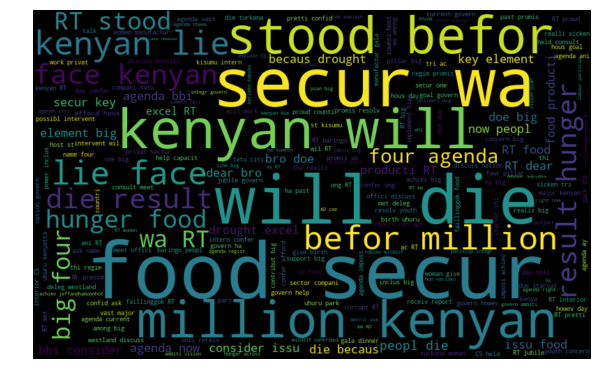

In [66]:
# Here we check for the common words in the tweets. 
# and display them on a word cloud
all_words = ' '.join([text for text in hack['Tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [79]:
# extraction of common phrases adn features in the tweets.
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(hack['Tweet'])
tfidf.shape

(1786, 589)

In [82]:
from textblob import TextBlob

In [88]:
T = hack['Tweet']
df_words = TextBlob('T')

In [101]:
df_words.words.count['food']

TypeError: 'method' object is not subscriptable